In [1428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler


In [1429]:

train_df=pd.read_csv("Train_heart_disease_uci.csv")
train_df.shape
test_df=pd.read_csv("Test_heart_disease_uci.csv")

In [1430]:
# train_df.head(n=5)

In [1431]:
# train_df.isnull().sum()

In [1432]:
# train_df.info()

In [1433]:
# train_df.describe()

In [1434]:
# from pandas.api.types import is_numeric_dtype
# for col in train_df.drop(columns=['cp','fbs','sex','id','restecg','exang','slope','thal','num']):
#     if is_numeric_dtype(train_df[col]):
#         sns.histplot(train_df[col])
#         plt.title(f"Distribution of {col}")
#         plt.show()

In [1435]:
# sns.boxplot(data=train_df.drop(columns=['cp','fbs','sex','id','restecg','exang','slope','thal','num']))
# plt.show()

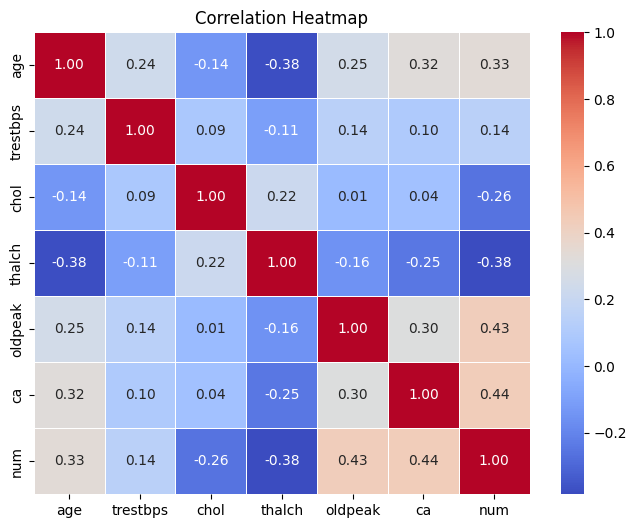

In [1436]:
corr_matrix = train_df.drop(columns=['cp','fbs','sex','id','restecg','exang','slope','thal','dataset']).corr()
plt.figure(figsize=(8, 6))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [1437]:
# sns.pairplot(train_df) 
# plt.show()

In [1438]:
# train_df.drop(columns=['dataset'],inplace=True)
# test_df.drop(columns=['dataset'],inplace=True)


In [1439]:
train_df.drop_duplicates()
test_df.drop_duplicates()   

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
4,14,44,Male,Cleveland,atypical angina,120.0,263.0,False,normal,173.0,False,0.0,upsloping,0.0,reversable defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,896,58,Male,VA Long Beach,asymptomatic,100.0,213.0,False,st-t abnormality,110.0,False,0.0,NaN,NaN,NaN
226,901,57,Male,VA Long Beach,asymptomatic,122.0,264.0,False,lv hypertrophy,100.0,False,0.0,NaN,NaN,NaN
227,902,55,Male,VA Long Beach,non-anginal,NaN,NaN,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
228,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN


In [1440]:
# train_df.isnull().sum()

In [1441]:
# for col in train_df.columns:
#     print(f"COL:{col}")
#     print(train_df[col].unique())

In [1442]:
# train_df.drop(columns=['ca','thal','slope'],inplace=True)
# test_df.drop(columns=['ca','thal','slope'],inplace=True)

In [1443]:
train_df=pd.get_dummies(train_df,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset'])
test_df=pd.get_dummies(test_df,columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset'])

In [1444]:
train_df = train_df[[col for col in train_df.columns if col != 'num'] + ['num']]

In [1445]:
cols_standerize=['age','trestbps','chol','thalch','oldpeak']
scaler = StandardScaler()
train_df[cols_standerize]=scaler.fit_transform(train_df[cols_standerize])
test_df[cols_standerize]=scaler.transform(test_df[cols_standerize])

In [1446]:
train_df[train_df.select_dtypes(include=['bool']).columns] = train_df.select_dtypes(include=['bool']).astype(int)
test_df[test_df.select_dtypes(include=['bool']).columns] = test_df.select_dtypes(include=['bool']).astype(int)

In [1447]:
# features=train_df.columns.delete([0,19])
# imputer = SimpleImputer(strategy="mean")
# train_df[features] = imputer.fit_transform(train_df[features])

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,cp_asymptomatic,...,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,num
0,223,-1.532526,-1.980850,0.004200,1.600773,-0.829527,0.0,1,0,0,...,0,1,0,1,0,1,0,0,0,0.0
1,850,-0.582253,NaN,0.661610,NaN,NaN,NaN,0,1,1,...,0,0,0,0,0,0,0,0,1,0.0
2,749,0.262435,-0.626247,-0.887356,-0.695135,0.548057,0.0,0,1,1,...,1,0,0,0,1,0,0,0,1,1.0
3,421,-0.265495,-1.147248,-0.076851,-0.695135,-0.829527,NaN,1,0,0,...,0,0,0,0,0,0,1,0,0,0.0
4,312,-2.166042,-0.626247,0.895756,1.834256,-0.829527,NaN,0,1,0,...,0,0,0,0,0,0,1,0,0,0.0


In [ ]:
train_df['num'].unique()

array([0.        , 1.        , 1.01663202, 2.        , 3.        ,
       4.        ])

In [ ]:
train_df['num'] = train_df['num'].astype(int)  # Convert to integers
X = train_df.drop(columns=['num','id'], axis=1)
y = train_df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
base_learner = DecisionTreeClassifier(max_depth=1)

In [ ]:
adaboost = AdaBoostClassifier(base_learner, n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"MSE:{mse:.4f}")
print(f"MAE:{mae:.4f}")

Accuracy: 0.4783
MSE:1.1063
MAE:0.7005


c:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
gradientboost=GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, random_state=42)
gradientboost.fit(X_train,y_train)
#y_pred=gradientboost.predict(test_df.drop(columns=['id'], axis=1))
# accuracy=accuracy_score(y_test,y_pred)
# mse=mean_squared_error(y_test,y_pred)
# mae=mean_absolute_error(y_test,y_pred)
# print(f"Accuracy: {accuracy:.4f}")
# print(f"MSE:{mse:.4f}")
# print(f"MAE:{mae:.4f}")

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,
                           random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


randomforrest=RandomForestClassifier(n_estimators=100, random_state=42)
randomforrest.fit(X_train,y_train)
y_pred=randomforrest.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"MSE:{mse:.4f}") 

Accuracy: 0.5362
MSE:0.9082


In [ ]:
# Extract IDs from test_df to ensure matching lengths
ids = test_df['id'].values
predictions = randomforrest.predict(test_df.drop(columns=['id'], axis=1))

# Create DataFrame with matching length arrays
results_df = pd.DataFrame({
    'id': ids,
    'prediction': predictions
})
results_df.to_csv('submission.csv', index=False)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"MSE:{mse:.4f}")
print(f"MAE:{mae:.4f}")

Accuracy: 0.5652
MSE:0.9179
MAE:0.5797


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [2, 3, 5]
# }

# grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
# grid.fit(X_train, y_train)
# print(grid.best_params_)
# print(grid.best_score_)